In [1]:
import numpy as np

In [2]:
def MNK_second():
    alpha0 = 1. 
    beta = 1.
    delta = 1.
    omega = 0.
    gamma = 1.
    x0 = 4
    y0 = 2
    X0 = (x0, y0)


    Nt = 1000
    tmax = 30
    t_array = np.linspace(0.,tmax, Nt)
    dt = t_array[1] - t_array[0]

    nt = len(t_array)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    X[1] = [3.8622052 , 2.18806916]
    '''
    a1 = 0.5
    a2 = -2.
    a3 = 1.5'''
    a2 = 4/3
    a3 = -1/3

    for i in range(0, Nt - 2):
        k1 = 1 - dt * alpha0 * (1 + np.sin(omega * (i + 2) * dt))
        r1 = dt
        s1 = (X[i + 1][0] * a2 + X[i][0] * a3)

        k2 = 1. + delta * dt
        r2 = dt * beta
        s2 = (X[i + 1][1] * a2 + X[i][1] * a3)
        
        c1 = k2 * r1
        c2 = k2 * k1 - r2 * s1 - s2 * r1
        c3 = s2 * k1

        discriminant = c2 ** 2 + 4 * c1 * c3
        
        X[i + 2][1] = (-1. * c2 + np.sqrt(discriminant)) / (2. * c1)
        X[i + 2][0] = s1 / (k1 + r1 * X[i + 2][1])
    return t_array, X


In [3]:
t, answer = MNK_second()
answer

array([[4.        , 2.        ],
       [3.8622052 , 2.18806916],
       [3.65745916, 2.44595483],
       ...,
       [0.05731892, 0.75981106],
       [0.05798367, 0.72821414],
       [0.05873803, 0.69795339]])

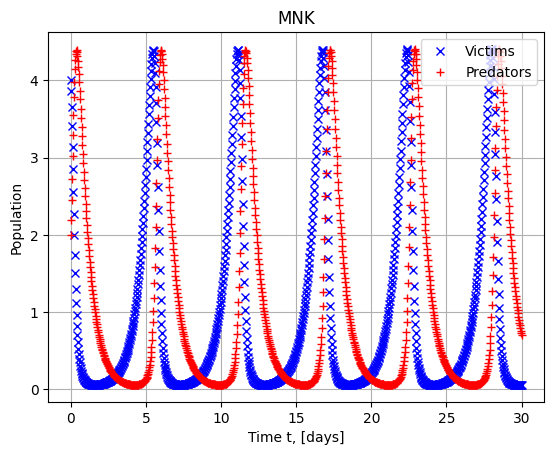

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.grid()
plt.title("MNK")
plt.plot(t, answer[:, 0], 'xb', label = 'Victims')
plt.plot(t, answer[:, 1], '+r', label = "Predators")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Phase plane : Victims vs Predators (MNK3)')

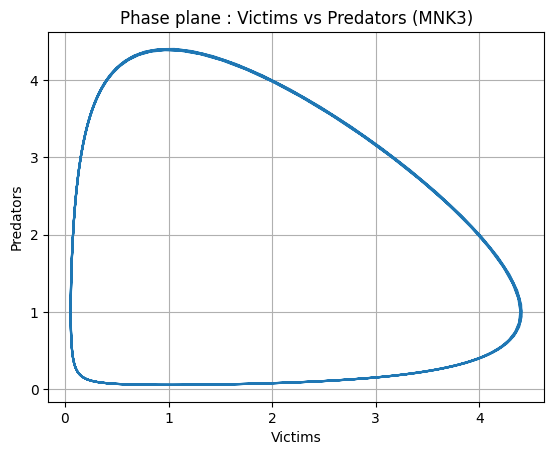

In [8]:
plt.figure()
plt.plot(answer[:, 0], answer[:, 1], "-")
plt.xlabel("Victims")
plt.ylabel("Predators")
plt.grid()
plt.title("Phase plane : Victims vs Predators (MNK3)")

In [7]:
print(answer[2])

[3.65745916 2.44595483]
